In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Load dataframes
dip_df = pd.read_csv("dip-har-eff.csv")

# Gather info
dip_rows = dip_df.shape[0]
dip_cols = dip_df.shape[1]

dip_df = dip_df.values
dip_df = dip_df[np.arange(0, dip_rows), :]

dip_X = dip_df[:,1]
dip_Y = dip_df[:,2]
dip_X_max = np.max(dip_X)
dip_Y_max = np.max(dip_Y)

dip_X = np.true_divide(dip_X, dip_X_max)
dip_Y = np.true_divide(dip_Y, dip_Y_max)

# Config pyplot
# plt.xlim(0, max(dip_X))
# plt.ylim(0, max(dip_Y))

In [36]:
def calcMean(results):
    results_sum = sum(results)
    return results_sum / len(results)

def calcRSquared(predicted, actual):
    return predicted / actual

def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / batchSize

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)


# Gradient Descent Optimization : *Batch Size=10*

 b0: -0.326753710937 b1: 1.10003306864 Error: 0.337417295794
 b0: -0.245713455225 b1: 1.14452429255 Error: 0.0795963475544
 b0: -0.207277767614 b1: 1.16339956881 Error: 0.0287896583172
 b0: -0.188538782934 b1: 1.17047885316 Error: 0.0198386921472
 b0: -0.178916544351 b1: 1.17214391264 Error: 0.0187531508705
 b0: -0.173524498906 b1: 1.17134135149 Error: 0.0188554555838
 b0: -0.170105485577 b1: 1.16943132753 Error: 0.0189861578293
 b0: -0.167616683144 b1: 1.16704134412 Error: 0.0190204760106
 b0: -0.165576096796 b1: 1.16446055641 Error: 0.0189884435608
 b0: -0.163760746021 b1: 1.1618218735 Error: 0.0189226251256
 b0: -0.162067278619 b1: 1.15918605828 Error: 0.0188420142199
 b0: -0.160447597941 b1: 1.15658056707 Error: 0.0187561804475
 b0: -0.158879133481 b1: 1.15401748661 Error: 0.0186696635157
 b0: -0.157351110789 b1: 1.15150181764 Error: 0.0185845347882
 b0: -0.155858210362 b1: 1.14903530028 Error: 0.0185016953897
 b0: -0.154397638986 b1: 1.14661818044 Error: 0.0184215009282
 b0: -0.15

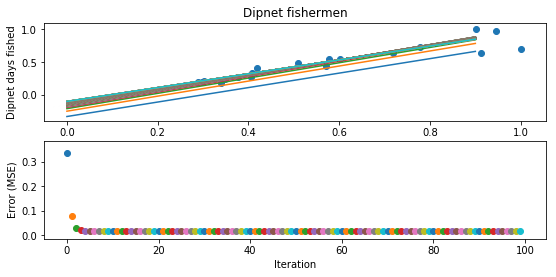

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 10
epochs = 100

learn = 0.4

plt.figure(figsize=(9,4))

# Get current size
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [9.5,6]

plt.subplot(211)

plt.xlabel('Dipnet days fished')
plt.ylabel('Dipnet days fished')
plt.title('Dipnet fishermen')
plt.scatter(dip_X, dip_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dip_X), batchSize)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)]


batch_10_ERRORS = []

for i in range(100):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    batch_10_ERRORS.append(ERROR)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)
    
plt.subplot(212)
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')
    
for count, value in enumerate(batch_10_ERRORS):
    plt.scatter(count,value)

plt.subplots_adjust(bottom=1.00, top=1.75)
plt.show()